# Titannic 生存分析

## 数据总览

In [1]:
import re 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [109]:
train_data = pd.read_csv(r'D:\code\project\dp_models\datasets\titannic\train.csv')
test_data = pd.read_csv(r'D:\code\project\dp_models\datasets\titannic\test.csv')

In [110]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [111]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [112]:
sns.set_style('whitegrid') # ？
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
train_data.info()
train_data.info()
print("-!-" * 40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived

从上面我们可以看出，Age、Cabin、Embarked、Fare几个特征存在缺失值。

* labeldistance，文本的位置离远点有多远，1.1指1.1倍半径的位置
* autopct，圆里面的文本格式，%3.1f%%表示小数有三位，整数有一位的浮点数
* shadow，饼是否有阴影
* startangle，起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看
* pctdistance，百分比的text离圆心的距离
* patches, l_texts, p_texts，为了得到饼图的返回值，p_texts饼图内部文本的，l_texts饼图外label的文本

<AxesSubplot:xlabel='Survived'>

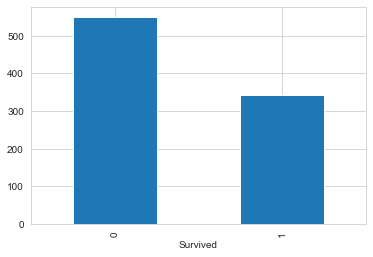

In [114]:
train_data['Survived'].value_counts().plot.bar(xlabel = 'Survived')

<AxesSubplot:ylabel='Survived'>

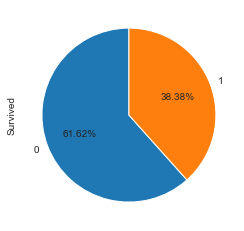

In [115]:
train_data['Survived'].value_counts().plot.pie(labeldistance = 1.1, autopct = '%1.2f%%', shadow = False, startangle = 90, pctdistance = 0.6)

## 缺失值分析

对数据进行分析的时候要注意其中是否有缺失值。一些机器学习算法能够处理缺失值，比如神经网络，一些则不能。
对于缺失值，一般有以下几种处理方法:

1. 如果数据集很多，但有很少的缺失值，可以删掉带缺失值的行；
2. 如果该属性相对学习来说不是很重要，可以对缺失值赋均值或者众数。
3. 对于标称属性，可以赋一个代表缺失的值，比如‘U0’。因为缺失本身也可能代表着一些隐含信息。比如船舱号Cabin这一属性，缺失可能代表并没有船舱。

比如在哪儿上船Embarked这一属性（共有三个上船地点），缺失俩值，可以用众数赋值

In [128]:
# train_data.Embarked[train_data.Embarked.isnull()]

# train_data.Embarked.dropna().mode().values

In [129]:
train_data.Embarked[train_data.Embarked.isnull()] = train_data.Embarked.dropna().mode().values
#replace missing value with U0
train_data['Cabin'] = train_data.Cabin.fillna('U0')    
#train_data.Cabin[train_data.CAbin.isnull()]='U0'

使用回归 随机森林等模型来预测缺失属性的值。因为Age在该数据集里是一个相当重要的特征（先对Age进行分析即可得知），所以保证一定的缺失值填充准确率是非常重要的，对结果也会产生较大影响。一般情况下，会使用数据完整的条目作为模型的训练集，以此来预测缺失值。对于当前的这个数据，可以使用随机森林来预测也可以使用线性回归预测。这里使用随机森林预测模型，选取数据集中的数值属性作为特征（因为sklearn的模型只能处理数值属性，所以这里先仅选取数值特征，但在实际的应用中需要将非数值特征转换为数值特征）

In [47]:
from sklearn.ensemble import RandomForestRegressor

#choose training data to predict age
age_df = train_data[['Age','Survived','Fare', 'Parch', 'SibSp', 'Pclass']]
age_df_notnull = age_df.loc[(train_data['Age'].notnull())]
age_df_isnull = age_df.loc[(train_data['Age'].isnull())]
X = age_df_notnull.values[:,1:]
Y = age_df_notnull.values[:,0]

# use RandomForestRegression to train data
RFR = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
RFR.fit(X,Y)
predictAges = RFR.predict(age_df_isnull.values[:,1:])
train_data.loc[train_data['Age'].isnull(), ['Age']]= predictAges

In [139]:
from sklearn.ensemble import RandomForestRegressor
# choose training data to predict age
age_df = train_data[['Age', 'Survived', 'Fare', 'Parch', 'SibSp', 'Pclass']]
age_df_notnull = age_df.loc[(train_data['Age'].notnull())]
age_df_isnull = age_df.loc[(train_data['Age'].isnull())]
X = age_df_notnull.values[:,1:]
Y = age_df_notnull.values[:,0]

# use RandomForestRegression to train data
RFR = RandomForestRegressor(n_estimators=1000, n_jobs = -1)
RFR.fit(X, Y)
predictAges = RFR.predict(age_df_isnull.values[:, 1:])
train_data.loc[train_data['Age'].isnull(), ['Age']] = predictAges

让我们再来看一下缺失数据处理后的DataFram：


In [140]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 3. 分析数据关系

### 3.1 性别与是否生存的关系 Sex

In [57]:
train_data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [146]:
train_data[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


<AxesSubplot:xlabel='Sex'>

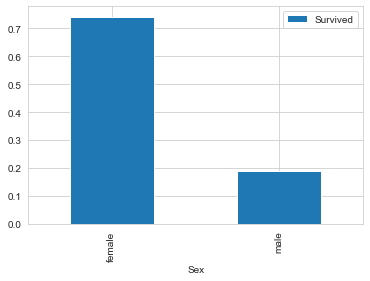

In [58]:
train_data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar()

以上为不同性别的生存率，可见在泰坦尼克号事故中，还是体现了Lady First.



### 3.2 船舱等级和生存与否的关系 Pclass

In [59]:
print(train_data.groupby(['Pclass','Survived'])['Pclass'].count())

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64


In [61]:
train_data[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Pclass'>

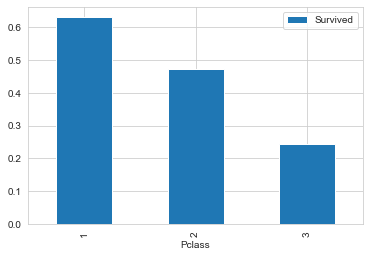

In [62]:
train_data[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

<AxesSubplot:xlabel='Pclass,Sex'>

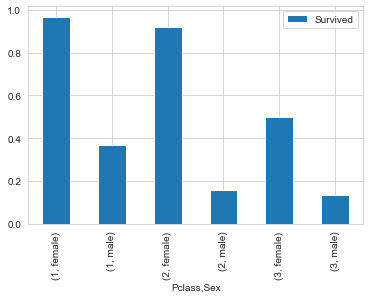

In [63]:
train_data[['Sex','Pclass','Survived']].groupby(['Pclass','Sex']).mean().plot.bar()

从图和表中可以看出，总体上泰坦尼克号逃生是妇女优先，但是对于不同等级的船舱还是有一定的区别。



### 3.3 年龄与存活与否的关系Age

分别分析不同等级船舱和不同性别下的年龄分布和生存的关系：



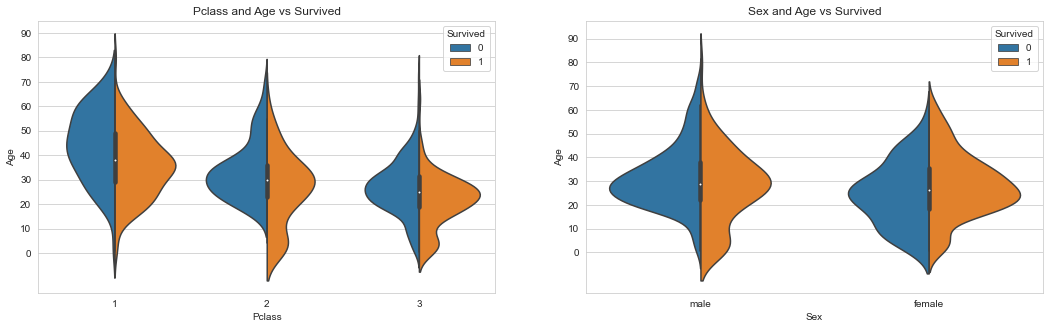

In [64]:
fig,ax = plt.subplots(1,2, figsize = (18,5))
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Pclass","Age",hue="Survived",data=train_data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived') 

ax[1].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue="Survived",data=train_data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
 
plt.show()

分析总体年龄分布

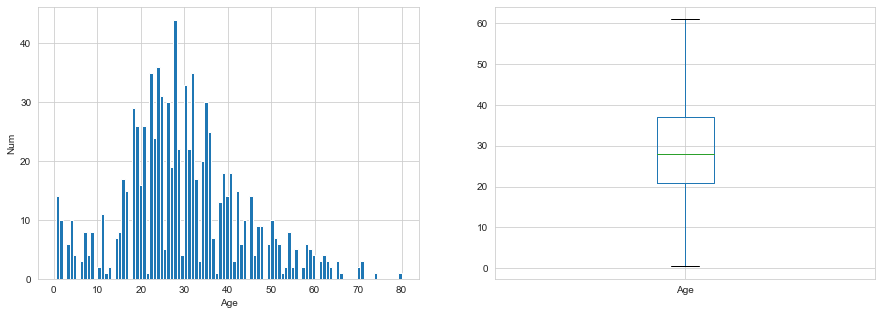

In [65]:
plt.figure(figsize=(15,5))
plt.subplot(121)
train_data['Age'].hist(bins=100)
plt.xlabel('Age')
plt.ylabel('Num')
 
plt.subplot(122)
train_data.boxplot(column='Age',showfliers=False)
plt.show()

不同年龄下的生存和非生存的分布情况：



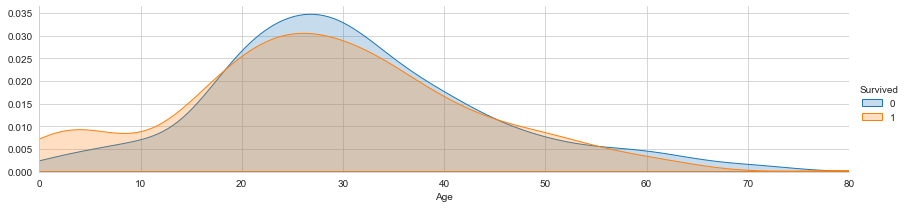

In [66]:
facet = sns.FacetGrid(train_data,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train_data['Age'].max()))
facet.add_legend()


不同年龄下的平均生存率：



<AxesSubplot:xlabel='Age_int', ylabel='Survived'>

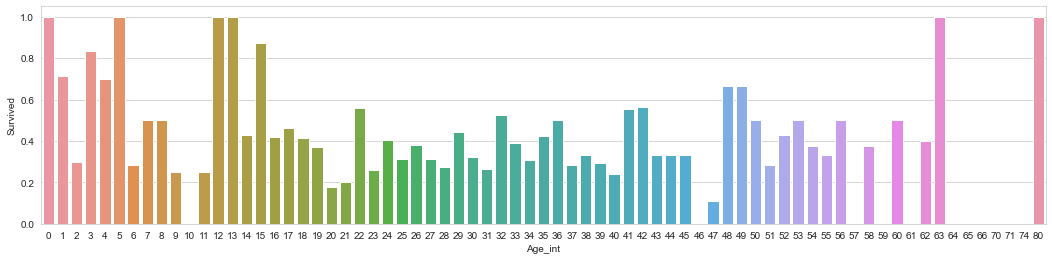

In [67]:
# average survived passengers by age
fig,axis1 = plt.subplots(1,1,figsize=(18,4))
train_data['Age_int'] = train_data['Age'].astype(int)
average_age = train_data[["Age_int", "Survived"]].groupby(['Age_int'],as_index=False).mean()
sns.barplot(x='Age_int',y='Survived',data=average_age)

In [68]:
print(train_data['Age'].describe())

count    891.000000
mean      29.657310
std       13.741405
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64


样本有891，平均年龄约为30岁，标准差13.5岁，最小年龄0.42，最大年龄80.
按照年龄，将乘客划分为儿童、少年、成年、老年，分析四个群体的生还情况

In [71]:
bins = [0, 12, 18, 65, 100]
train_data['Age_group'] = pd.cut(train_data['Age'],bins)
by_age = train_data.groupby('Age_group')['Survived'].mean()
print(by_age)

Age_group
(0, 12]      0.506173
(12, 18]     0.466667
(18, 65]     0.364512
(65, 100]    0.125000
Name: Survived, dtype: float64


In [82]:
# by_age.plot(kind = 'bar')

### 3.4 称呼与存活与否的关系 Name


通过观察名字数据，我们可以看出其中包括对乘客的称呼，如：Mr、Miss、Mrs等，称呼信息包含了乘客的年龄、性别，同时也包含了入社会地位等的称呼，如：Dr，Lady，Major（少校），Master（硕士，主人，师傅）等的称呼。



In [83]:
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)
pd.crosstab(train_data['Title'],train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


<AxesSubplot:xlabel='Title'>

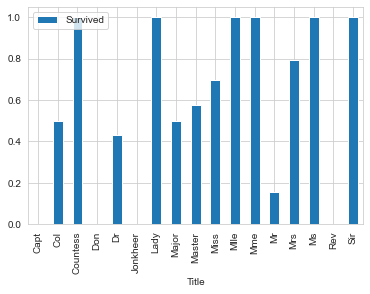

In [84]:
train_data[['Title','Survived']].groupby(['Title']).mean().plot.bar()

同时，对于名字，我们还可以观察名字长度和生存率之间存在关系的可能：



<AxesSubplot:xlabel='Name_length', ylabel='Survived'>

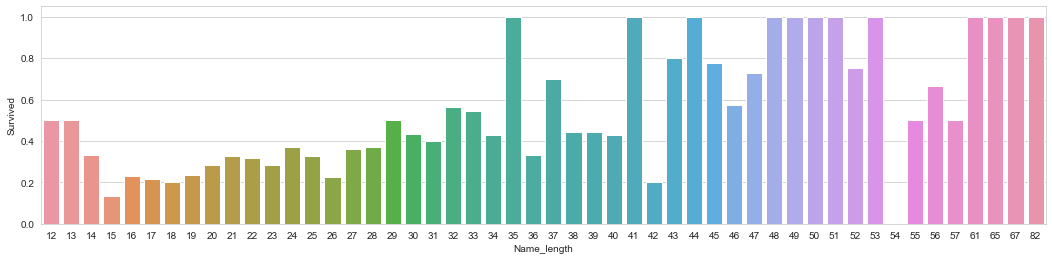

In [85]:
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
train_data['Name_length'] = train_data['Name'].apply(len)
name_length = train_data[['Name_length','Survived']].groupby(['Name_length'], as_index=False).mean()
sns.barplot(x='Name_length', y='Survived',data=name_length)

从上面的图片可以看出，名字长度和生存与否确实也存在一定的相关性.



### 3.5 有无兄弟姐妹和存活与否的关系 SibSp

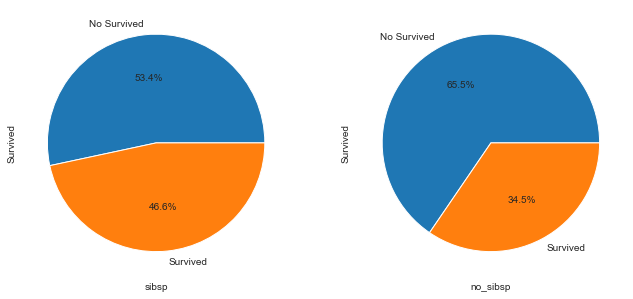

In [86]:
#将数据分为有兄弟姐妹和没有兄弟姐妹的两组：
sibsp_df = train_data[train_data['SibSp'] != 0]
no_sibsp_df = train_data[train_data['SibSp'] == 0]

plt.figure(figsize=(11,5))
plt.subplot(121)
sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],autopct= '%1.1f%%')
plt.xlabel('sibsp')
 
plt.subplot(122)
no_sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],autopct= '%1.1f%%')
plt.xlabel('no_sibsp')
 
plt.show()

###  3.6 有无父母子女和存活与否的关系 Parch

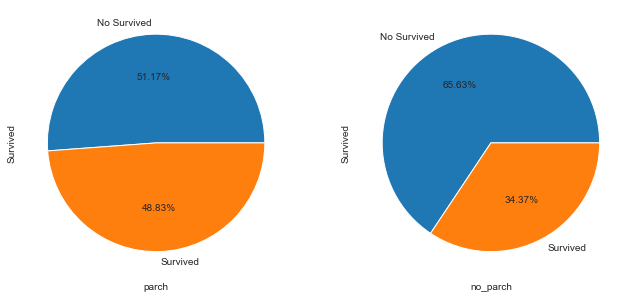

In [87]:
parch_df = train_data[train_data['Parch'] != 0]  
no_parch_df = train_data[train_data['Parch'] == 0]  
 
plt.figure(figsize=(11,5))  
plt.subplot(121)  
parch_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct= '%1.2f%%')  
plt.xlabel('parch')  
 
plt.subplot(122)  
no_parch_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.2f%%')  
plt.xlabel('no_parch') 
 
plt.show()  

### 3.7 亲友的人数和存活与否的关系 SibSp & Parch

Text(0.5, 1.0, 'SibSp and Survived')

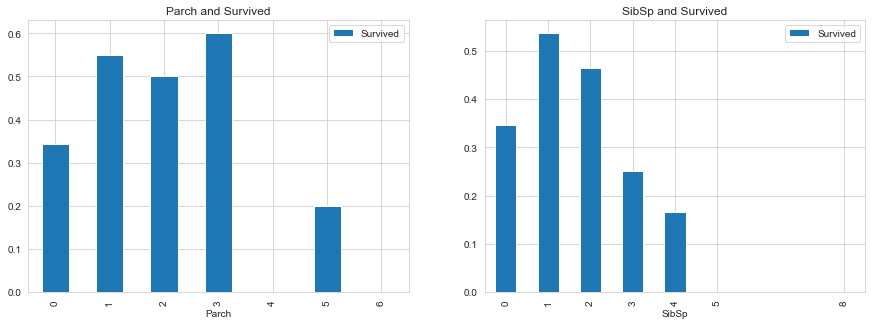

In [88]:
fig, ax=plt.subplots(1,2,figsize=(15,5))
train_data[['Parch','Survived']].groupby(['Parch']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Parch and Survived')
train_data[['SibSp','Survived']].groupby(['SibSp']).mean().plot.bar(ax=ax[1])
ax[1].set_title('SibSp and Survived')

<AxesSubplot:xlabel='Family_Size'>

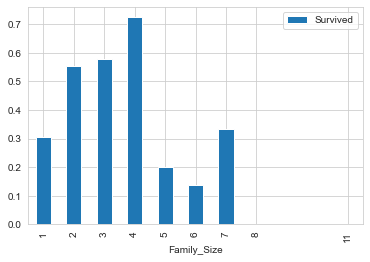

In [89]:
train_data['Family_Size'] = train_data['Parch'] + train_data['SibSp']+1
train_data[['Family_Size','Survived']].groupby(['Family_Size']).mean().plot.bar()

从图表中可以看出，若独自一人，那么其存活率比较低；但是如果亲友太多的话，存活率也会很低。



### 3.8 票价分布和存活与否的关系 Fare


首先绘制票价的分布情况：

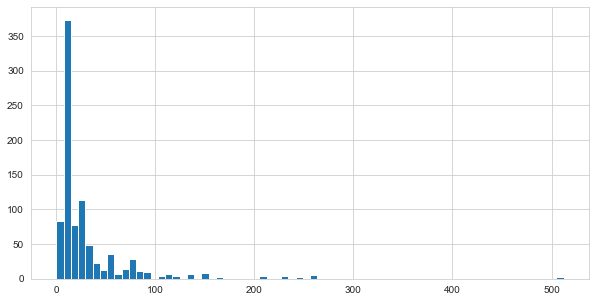

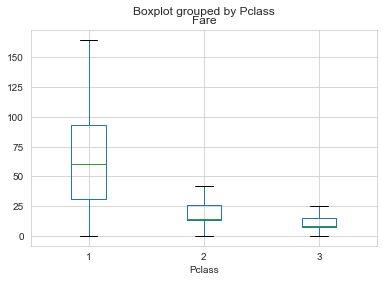

In [91]:
plt.figure(figsize=(10,5))
train_data['Fare'].hist(bins=70)
 
train_data.boxplot(column='Fare', by='Pclass', showfliers=False)
plt.show()

In [92]:
print(train_data['Fare'].describe())

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


绘制生存与否与票价均值和方差的关系：


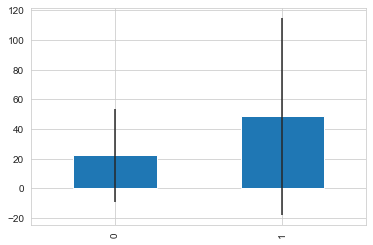

In [93]:
fare_not_survived = train_data['Fare'][train_data['Survived'] == 0]
fare_survived = train_data['Fare'][train_data['Survived'] == 1]
 
average_fare = pd.DataFrame([fare_not_survived.mean(),fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(),fare_survived.std()])
average_fare.plot(yerr=std_fare,kind='bar',legend=False)
 
plt.show()

由上图表可知，票价与是否生还有一定的相关性，生还者的平均票价要大于未生还者的平均票价。



### 3.9 船舱类型和存活与否的关系 Cabin


由于船舱的缺失值确实太多，有效值仅仅有204个，很难分析出不同的船舱和存活的关系，所以在做特征工程的时候，可以直接将该组特征丢弃掉。 当然，这里我们也可以对其进行一下分析，对于缺失的数据都分为一类。 简单地将数据分为是否有Cabin记录作为特征，与生存与否进行分析：

<AxesSubplot:xlabel='Has_Cabin'>

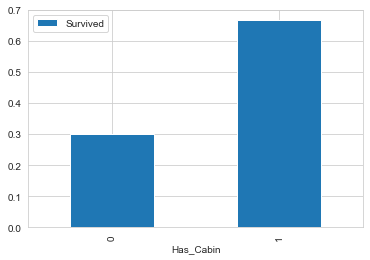

In [94]:
# Replace missing values with "U0"
train_data.loc[train_data.Cabin.isnull(),'Cabin'] = 'U0'
train_data['Has_Cabin'] = train_data['Cabin'].apply(lambda x: 0 if x == 'U0' else 1)
train_data[['Has_Cabin','Survived']].groupby(['Has_Cabin']).mean().plot.bar()

对不同类型的船舱进行分析：



<AxesSubplot:xlabel='CabinLetter'>

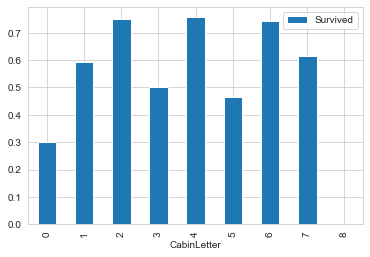

In [96]:
# create feature for the alphabetical part of the cabin number
train_data['CabinLetter'] = train_data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
# convert the distinct cabin letters with incremental integer values
train_data['CabinLetter'] = pd.factorize(train_data['CabinLetter'])[0]
train_data[['CabinLetter','Survived']].groupby(['CabinLetter']).mean().plot.bar()

可见，不同的船舱生存率也有不同，但是差别不是很大。所以在处理中，我们可以直接将特征删除。

### 3.10 港口和存活与否的关系 Embarked

泰坦尼克号从英国的南安普顿港出发，途径法国瑟堡和爱尔兰昆士敦，那么在昆士敦之前上船的人，有可能在瑟堡或昆士敦下船，这些人将不会遇到海难。

Text(0.5, 1.0, 'Embarked and Survived')

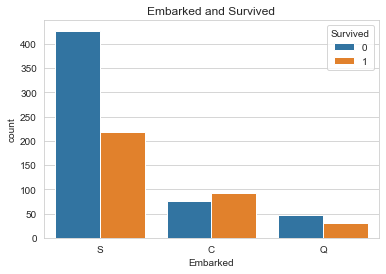

In [97]:
sns.countplot('Embarked',hue='Survived',data=train_data)
plt.title('Embarked and Survived')

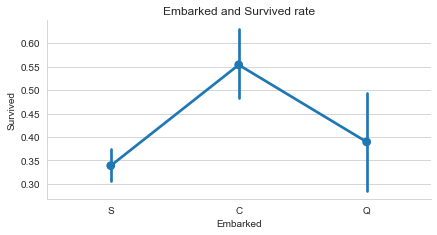

In [98]:
sns.factorplot('Embarked','Survived',data = train_data, size=3, aspect=2)
plt.title('Embarked and Survived rate')
plt.show()

由上可以看出，在不同的港口上船，生还率不同，C最高，Q次之，S最低。 以上为所给出的数据特征与生还与否的分析。 据了解，泰坦尼克号上共有2224名乘客。本训练数据只给出了891名乘客的信息，如果该数据集是从总共的2224人随机选出的，根据中心极限定理，该样本的数据量也足够大，那么我们的分析结果就具有代表性；但如果不是随机选取，那么我们的分析结果就可能不太靠谱了。

### 3.11 其他可能和存活与否有关系的特征

对于数据集中没有给出的特征信息，我们还可以联想其他可能会对模型产生影响的特征因素。如：乘客的国籍、乘客的身高、乘客的体重、乘客是否会游泳、乘客职业等等。
另外还有数据集中没有分析的几个特征：Ticket（船票号）、Cabin（船舱号），这些因素的不同可能会影响乘客在船中的位置从而影响逃生的顺序。但是船舱号数据缺失，船票号类别大，难以分析规律，所以在后期模型融合的时候，将这些因素交由模型来决定其重要性。

## 4. 变量转换

变量转换的目的是将数据转换为适用于模型使用的数据，不同模型接受不同类型的数据，Scikit-learn要求数据都是数字型numeric，所以我们要将一些非数字型的原始数据转换为数字型numeric。 所以下面对数据的转换进行介绍，以在进行特征工程的时候使用。 所有的数据可以分为两类：
1.定性（Qualitative）变量可以以某种方式，Age就是一个很好的例子。
2.定量（Quantitative）变量描述了物体的某一（不能被数学表示的）方面，Embarked就是一个例子。